# 1. Introduction to the Dataset
## Pokémon Statistics Report

I chose the Kaggle dataset (https://www.kaggle.com/datasets/abcsds/pokemon) regarding the statistics of Pokémon, the popular Japanese media franchise where creatures called Pokémon co-exist with humans. More specifically, the statistics used in the video games to determine the damage output between different types of Pokémon. This data set includes 721 Pokémon and their attributes, including number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

## Question to Investigate

This project aims to interpret how Pokémon types vary across different generations. In Pokémon, generations refer to when one or more games are released at a given time, often featuring new sets of Pokémon, regions, game mechanics, and more. There are nine generations of Pokémon, Generation IX was released as recently as 2022. However, this data set only includes up to Generation VI, which we can use to interpret how developers were thinking during crucial times of company expansion. As Pokémon Generations progress, do Pokémon get stronger in terms of Total Stats? And can the quantity of Pokémon types be visually shown to display a certain pattern across Generations?

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import statsmodels.api as sm

In [287]:
pokemon_data = pd.read_csv('/Users/joshuachvirko/Downloads/Pokemon.csv')
pokemon_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Quick overview of the contents inside of this dataset, featuring some of the first Pokémon featured in the game. Some Pokémon feature two Types which can effectively contribute to their overall Total. 

In [289]:
pokemon_data.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


This bottom set of data (most recently added) features what are known as Legendary Pokémon, creatures that are very rare to catch and display signifcant strength and moves that other Pokémon don't have. 

# 2. Descriptive Statistical Analysis 


In [292]:
pokemon_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Some strands of data to be aware of are outliers such as the max 780 Total, while the 75th percentile is 515. Certain factors such as Legendary Pokémon may display exceptionally high stats which influence data.

In [294]:
type_counts = pokemon_data.groupby(['Generation', 'Type 1']).size().unstack()

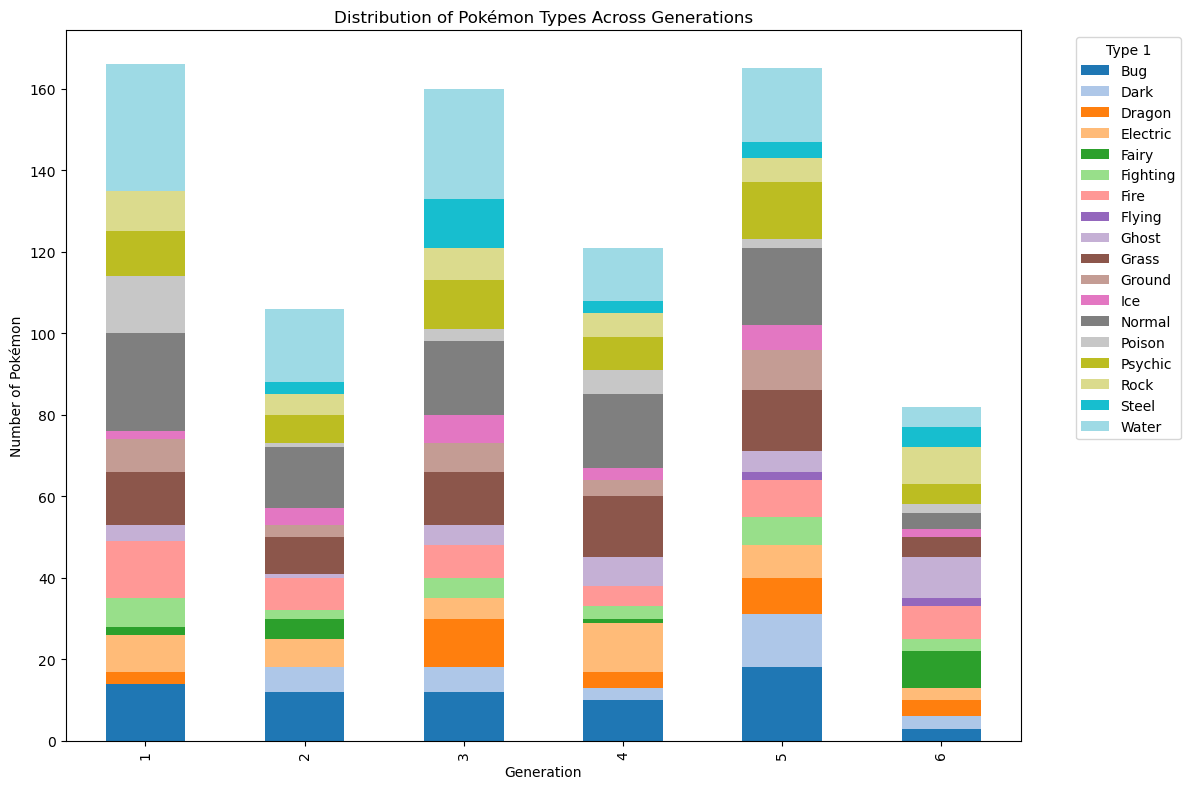

In [295]:
type_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Distribution of Pokémon Types Across Generations')
plt.xlabel('Generation')
plt.ylabel('Number of Pokémon')
plt.legend(title='Type 1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Individual bars rise and lower due to the amount of Pokémon in each release, this can be due to the developers balancing the game over the years. Types such as Water, Normal, Grass, and Bug types are very prevalent in most generations. Additionally, the number of Poison and Fairy types lowers to the point where some generations they're small or simply non-existent. 

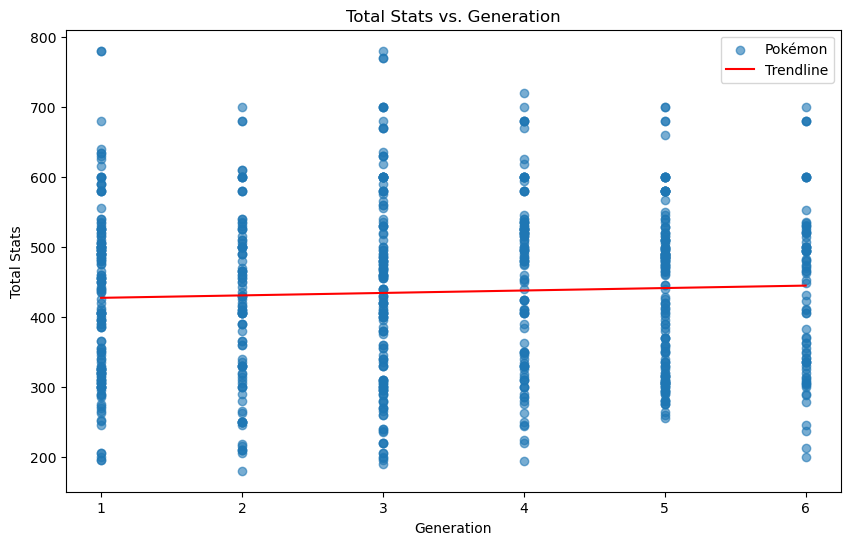

In [297]:
plt.figure(figsize=(10, 6))
plt.scatter(pokemon_data['Generation'], pokemon_data['Total'], alpha=0.6, label='Pokémon')

z = np.polyfit(pokemon_data['Generation'], pokemon_data['Total'], 1)
p = np.poly1d(z)
plt.plot(pokemon_data['Generation'], p(pokemon_data['Generation']), color='red', label='Trendline')

plt.title('Total Stats vs. Generation')
plt.xlabel('Generation')
plt.ylabel('Total Stats')
plt.legend()
plt.show()

This slight upward trend reveals that Pokémon released in later generations have a slightly marginal higher Total. No Total in Generation IV ever goes below the 250 range, and these results are not what I expected. I thought the trendline would have exhibited a much more positive correlated slope. To explore this surprise further I must measure the mean Total Stats for each Generation.

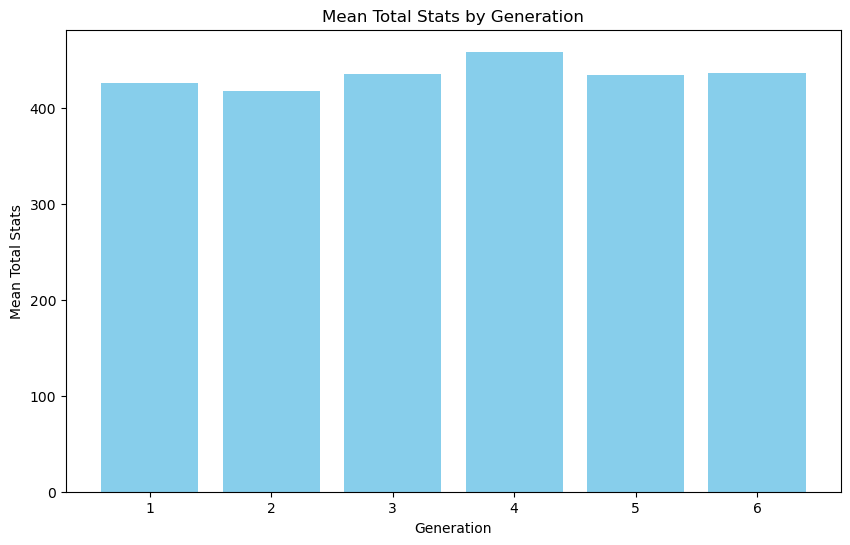

In [299]:
mean_stats = pokemon_data.groupby('Generation')['Total'].mean()

plt.figure(figsize=(10, 6))
plt.bar(mean_stats.index, mean_stats.values, color='skyblue')
plt.title('Mean Total Stats by Generation')
plt.xlabel('Generation')
plt.ylabel('Mean Total Stats')
plt.show()

This bar graph displays the mean Total Stats for each Generation. Here it can be shown more simply how expansions such as Generation IV display marginally higher results, this is due to the game experiencing a large influx of Pokémon Evolutions, which is when Pokémon evolve and get stronger. This results from developers balancing the game by adding new types of Pokémon that may have wielded special moves and power-ups, proving that there doesn't need to be a reliance on increasing attacks each Generation.

# 3. Statistical Inference

In [302]:
X = pokemon_data['Generation']
y = pokemon_data['Total']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.873
Date:                Wed, 04 Dec 2024   Prob (F-statistic):              0.172
Time:                        11:27:22   Log-Likelihood:                -4963.5
No. Observations:                 800   AIC:                             9931.
Df Residuals:                     798   BIC:                             9940.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        423.4898      9.486     44.643      0.0

$$
\text{Total Stats} = 423.49 + 3.49 \times \text{Generation}
$$

# 4. Conclusion

Based on a significance level of 0.05, the P-value (Generation) is 0.172 which is not significant enough to prove a distinction of later Generations equating to higher Totals. 

These results surprised me as I initially assumed that Generations exhibited higher Total Stats as they continued to be introduced. However, I now see that it was smart for the developers to create new types of Pokémon to keep players interested, which altered the entire game's landscape.

A Pokémon cannot always win a fight on sheer attack damage, though it certainly can give them an advantage. Each Pokémon has strengths and weaknesses, for example, Fire types are strong against Grass types but weak to Water types. Additionally, the R-squared value of 0.002 proves that only 0.2% of Total Stats can be correlated through Generation. This leaves other factors such as the type of Pokémon, Legendary status, and game design have a larger role. Further analysis with predictions or the inclusion of the three most recent Generations could provide insight into the nature of developers making decisions for future Generations. 